### Importamos las librearias

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import odeint

label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans', 'Tahoma']

%config InlineBackend.figure_format = 'svg' # figuras alta calidad jupyter

### Implementamos el modelo de Kuramoto usando Odeint de Python

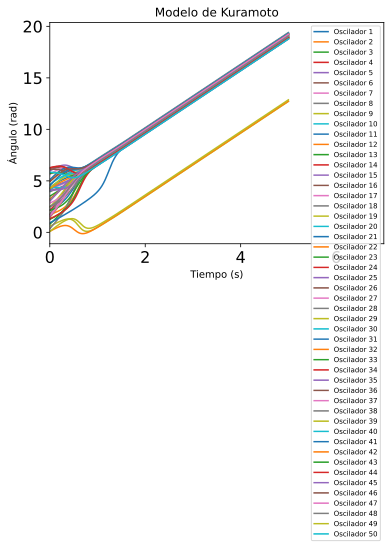

In [23]:
def KuramotoModel(theta, t, w, K, N):
    dtheta = np.zeros(N)
    for i in range(N):
        sum_sin = 0
        for j in range(N):
            sum_sin += np.sin(theta[j] - theta[i])
        dtheta[i] = w[i] + (K/N) * sum_sin
    return dtheta

# Parámetros
N = 50                 # Número de osciladores
K = 10                 # acoplamiento de Kuramoto
w =  2*np.pi*np.random.rand(N)   # frecuencia de cada oscilador

# Condicion inicial
x0 = 2*np.pi*np.random.rand(N)

# Tiempo
t0 = 0     # tiempo inicial en segundos
T = 5     # tiempo final en segundos
Nt = 1000  # Numero de pasos de tiempo
t = np.linspace(t0, T, Nt)

# Resolvemos el modelo de Kuramoto utilizando odeint
sol = odeint(KuramotoModel, x0, t, args=(w,K,N))

# Graficamos las soluciones
plt.figure(figsize=(6,4))
for i in range(N):
    plt.plot(t, sol[:,i], label=f'Oscilador {i+1}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Modelo de Kuramoto')
plt.legend(loc='best', fontsize=7)
plt.xlim(0.8*min(t), 1.4*max(t))
plt.show()

### Ahora calculamos el grado de sincronización por medio de la fórmula
 $$ r(t) = {1 \over N}\left|\sum_{j=1}^{N}e^{i\theta_j(t)} \right|$$

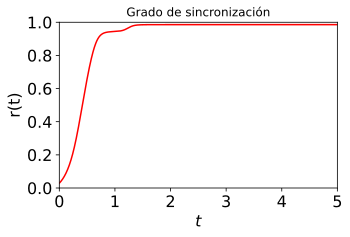

In [24]:
def GradoSincronizacion(sol,Nt,N):
    r = np.zeros(Nt)
    for i in range(Nt):
        sum_exp = np.sum(np.exp(1j*sol[i, :]))
        r[i] = np.abs(sum_exp)/N
    return r
 
r = GradoSincronizacion(sol,Nt,N)

# Graficar el orden de sincronización
plt.figure(figsize=(5,3))
plt.plot(t, r, label='Orden de sincronización r(t)', color='red')
plt.xlabel(r"$t$", fontsize=16, color='black')
plt.ylabel(r"r(t)",fontsize=16, color='black')
plt.title('Grado de sincronización')
plt.xlim(t0, T)
plt.ylim(0, 1)
plt.show()  